# Problem Statement:
Clustering: Digital Ads Data:
The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.
The following three features are commonly used in digital marketing:
    CPM = (Total Campaign Spend / Number of Impressions) * 1,000.
    Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 
    CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 
    CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. 
   Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 
The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File. 
Perform the following in given order:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

# Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [2]:
data= pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

In [3]:
data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
data.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
 13  Clus_kmeans5           23066 non-null  int32  
 14  cluster                23066 non-null  int32  
dtypes:

In [5]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.000000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.000000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.500000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.000000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.000000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.125000,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.350000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.335000,2.091338e+03,21276.18


In [6]:
data.duplicated().sum()

0

# Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [43]:
def impute_missing(col):
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

# Call the function for each column with missing values
impute_missing("CPM")
impute_missing("CPC")
impute_missing("CTR")



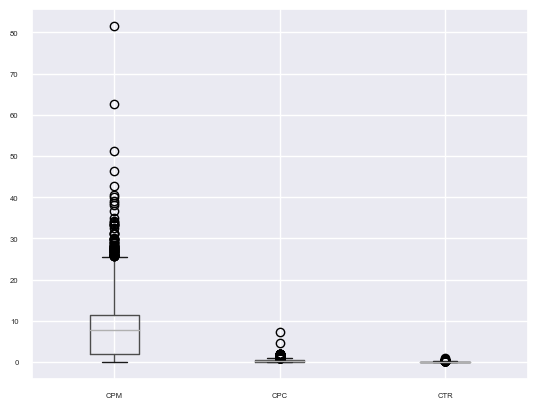

In [44]:
data.boxplot(["CPM", "CPC", "CTR"])
plt.show()


In [8]:
def calculate_CPM(x):
    Spend=data.Spend
    Impressions=df.Impressions
    CPM = (Spend/(Impressions)*1000)
    return CPM

In [9]:
def calculate_CPC(x):
    Spend=data.Spend
    Clicks=df.Clicks
    CPC = (Spend/(Clicks))
    return CPC

In [10]:
def calculate_CTR(x):
    Clicks=df.Clicks
    Impressions=data.Impressions
    CTR =(Clicks/Impressions)*100
    return CTR


In [42]:
data.isnull().sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
Clus_kmeans5             0
cluster                  0
dtype: int64

In [12]:
data = data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(data.columns.values)
len(lstnumericcolumns)

13

The description statistics for 'Ad - Length' column is:
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64


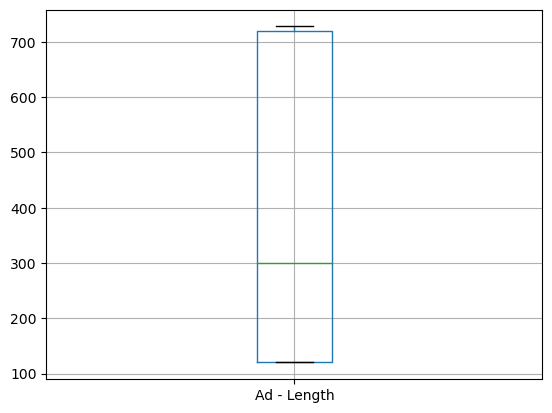

The description statistics for 'Ad- Width' column is:
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64


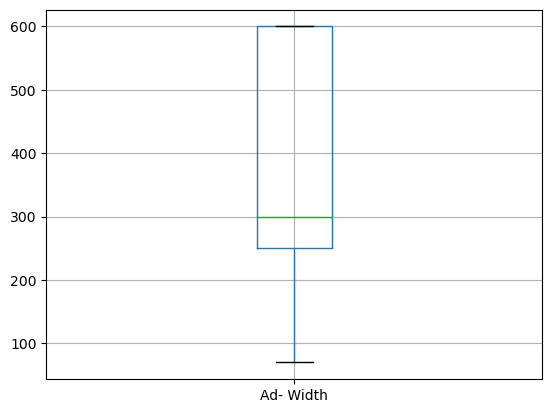

The description statistics for 'Ad Size' column is:
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64


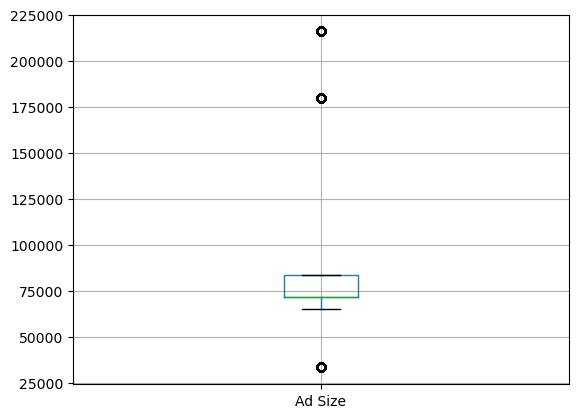

The description statistics for 'Available_Impressions' column is:
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64


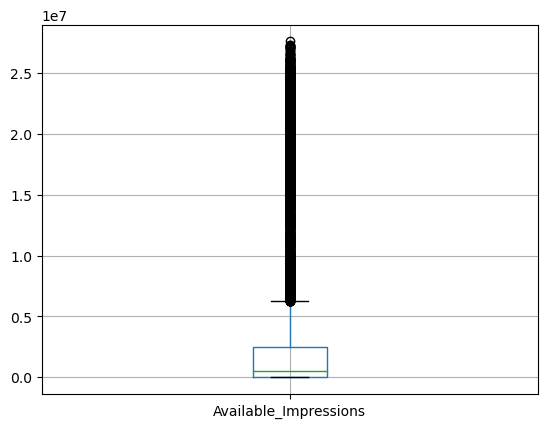

The description statistics for 'Matched_Queries' column is:
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64


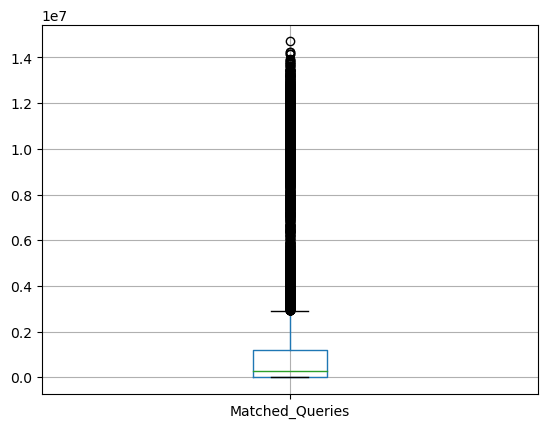

The description statistics for 'Impressions' column is:
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64


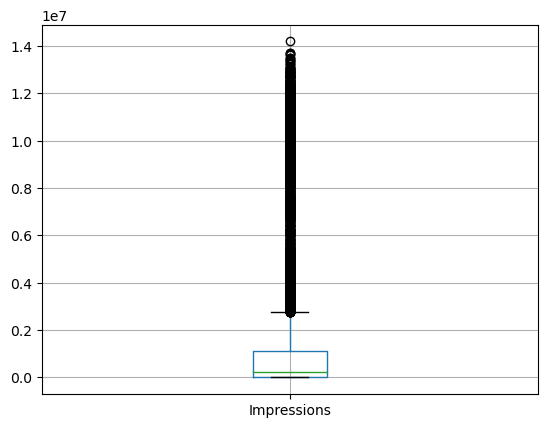

The description statistics for 'Clicks' column is:
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64


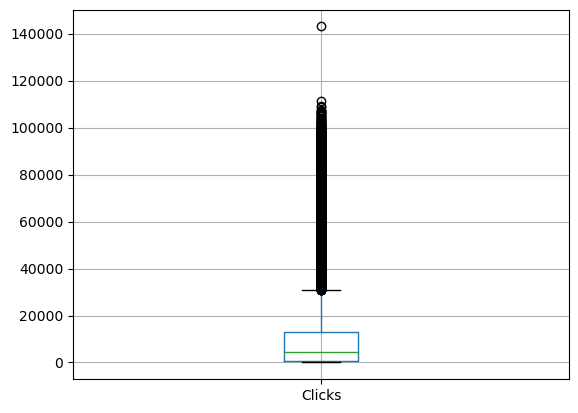

The description statistics for 'Spend' column is:
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64


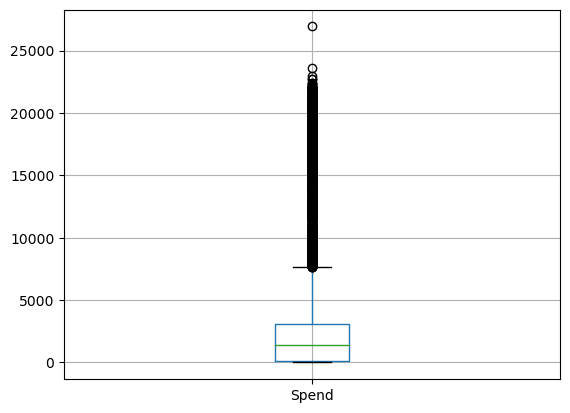

The description statistics for 'Fee' column is:
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64


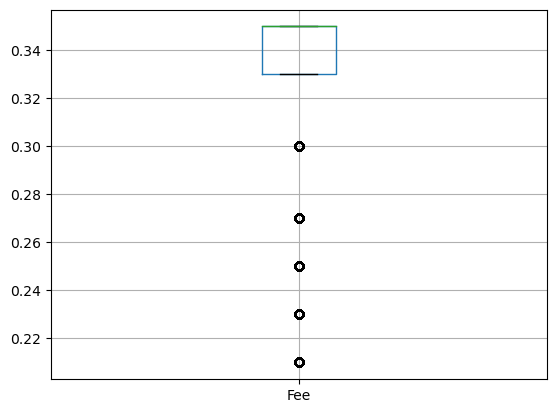

The description statistics for 'Revenue' column is:
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64


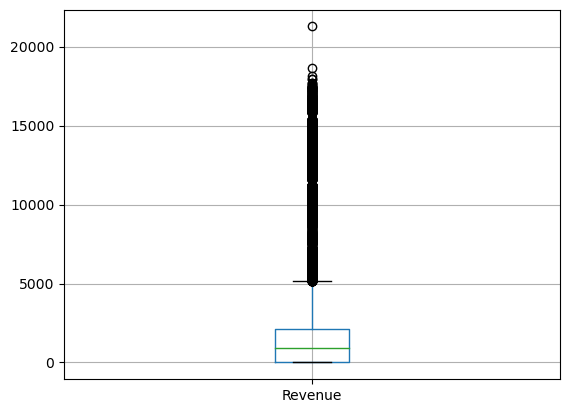

The description statistics for 'CTR' column is:
count    23066.000000
mean         0.073661
std          0.067001
min          0.000100
25%          0.003400
50%          0.073661
75%          0.121900
max          1.000000
Name: CTR, dtype: float64


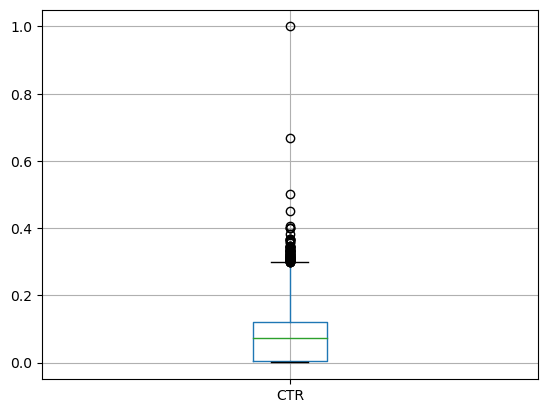

The description statistics for 'CPM' column is:
count    23066.000000
mean         7.672045
std          5.777778
min          0.000000
25%          1.850000
50%          7.672045
75%         11.340000
max         81.560000
Name: CPM, dtype: float64


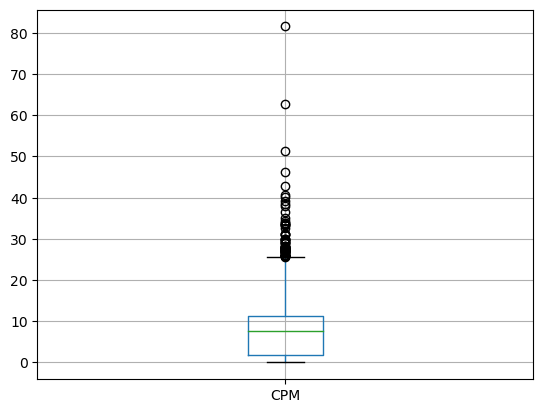

The description statistics for 'CPC' column is:
count    23066.000000
mean         0.351061
std          0.306062
min          0.000000
25%          0.100000
50%          0.351061
75%          0.470000
max          7.260000
Name: CPC, dtype: float64


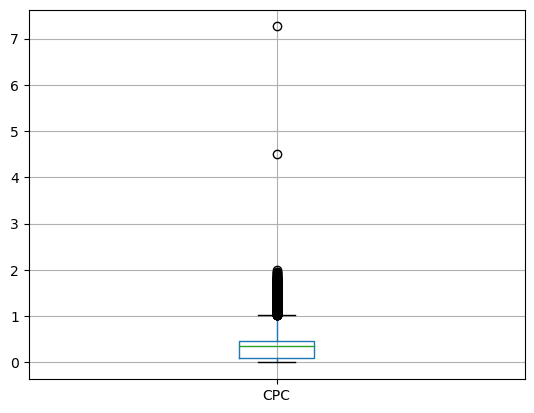

In [13]:
for i in range(0,13):
    print("The description statistics for '{}' column is:".format(lstnumericcolumns[i]))
    print(data[lstnumericcolumns[i]].describe())
    data.boxplot(column=lstnumericcolumns[i])
    plt.show()

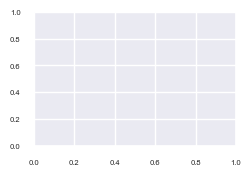

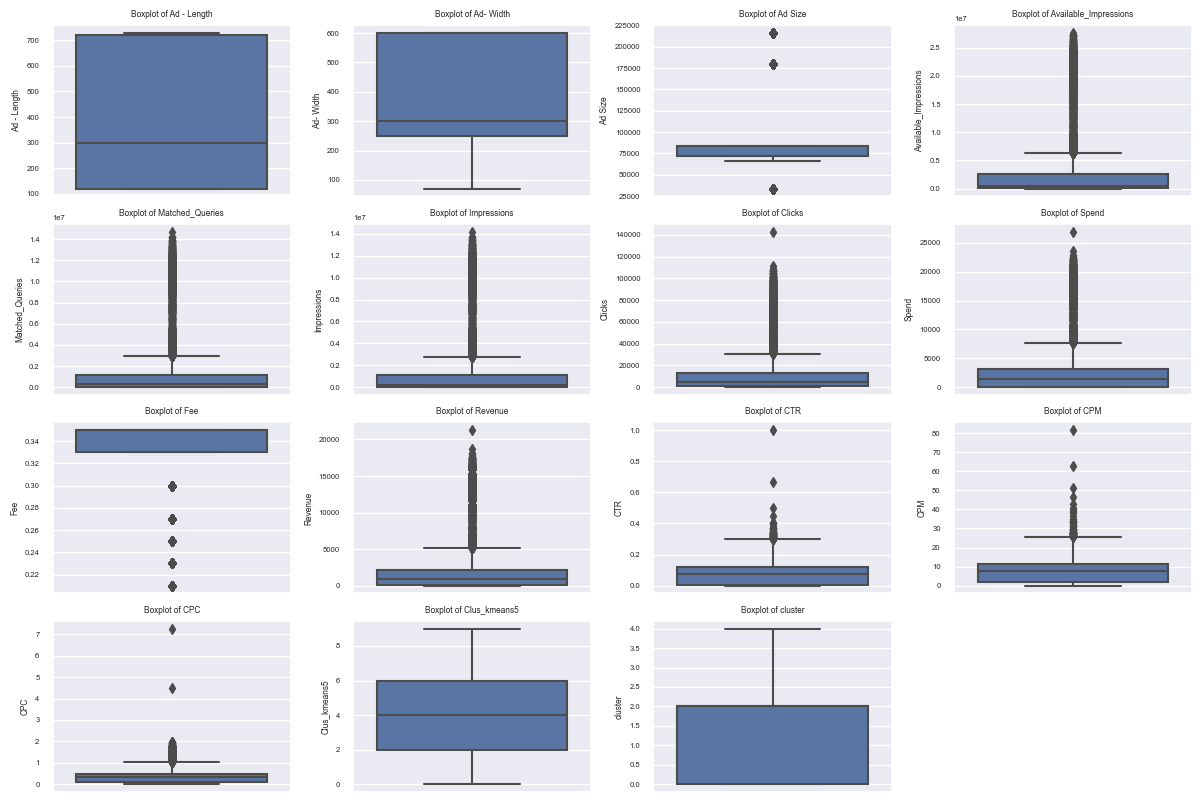

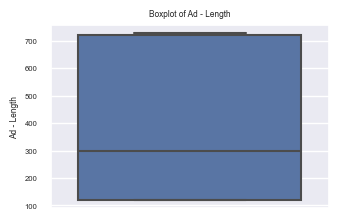

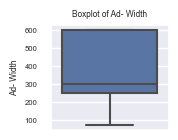

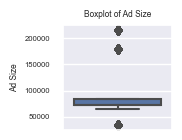

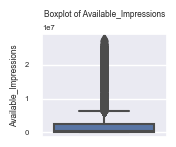

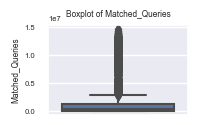

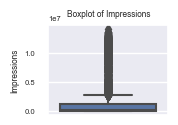

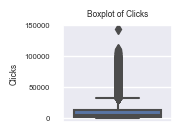

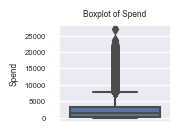

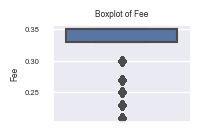

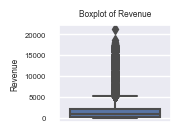

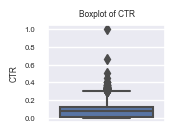

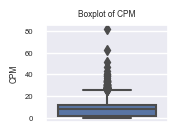

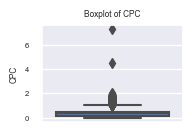

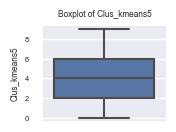

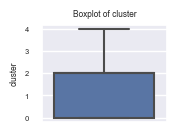

In [52]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [80]:
from sklearn.preprocessing import StandardScaler

# Scale the data using z-score scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.iloc[:,0:14]),columns=data.columns[0:14])
data_scaled

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,-0.364496,-0.432797,-0.352218,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,-1.053155e+00,-1.327883e+00,-1.14705,-0.379348
1,-0.364496,-0.432797,-0.352218,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,-1.047185e+00,-1.327883e+00,-1.14705,-0.379348
2,-0.364496,-0.432797,-0.352218,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,-1.057633e+00,-1.327883e+00,-1.14705,-0.379348
3,-0.364496,-0.432797,-0.352218,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,-1.069573e+00,-1.327883e+00,-1.14705,-0.379348
4,-0.364496,-0.432797,-0.352218,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,-1.038230e+00,-1.327883e+00,-1.14705,-0.379348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433093,-0.186599,1.939086,-0.512788,-0.515377,-0.511050,-0.615311,-0.665355,0.465447,-0.619678,-2.071337e-16,-1.537265e-16,0.00000,0.053159
23062,1.433093,-0.186599,1.939086,-0.512787,-0.515376,-0.511050,-0.615311,-0.665362,0.465447,-0.619684,-2.071337e-16,-1.537265e-16,0.00000,0.053159
23063,1.433093,-0.186599,1.939086,-0.512788,-0.515377,-0.511050,-0.615311,-0.665360,0.465447,-0.619682,-2.071337e-16,-1.537265e-16,0.00000,0.053159
23064,-1.134891,1.290590,-0.400970,-0.512787,-0.515377,-0.511050,-0.615311,-0.665355,0.465447,-0.619678,-2.071337e-16,-1.537265e-16,0.00000,-0.811855


In [81]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-3.644957e-01,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-1.865987e-01,1.290590,1.290590
Ad Size,23066.0,2.464381e-17,1.000022,-1.024985,-0.400970,-4.009697e-01,-0.205965,1.939086
Available_Impressions,23066.0,-1.971505e-17,1.000022,-0.512788,-0.505688,-4.107866e-01,0.020171,5.305072
Matched_Queries,23066.0,-5.914515e-17,1.000022,-0.515377,-0.508102,-4.126727e-01,-0.045524,5.335208
Impressions,23066.0,-1.971505e-17,1.000022,-0.511050,-0.507761,-4.183138e-01,-0.053138,5.331990
Clicks,23066.0,-3.943010e-17,1.000022,-0.615311,-0.574454,-3.603704e-01,0.121894,7.628089
Spend,23066.0,-3.943010e-17,1.000022,-0.665372,-0.644432,-3.150323e-01,0.101964,5.955310
Fee,23066.0,6.703117e-16,1.000022,-3.914682,-0.160285,4.654474e-01,0.465447,0.465447
Revenue,23066.0,7.886020e-17,1.000022,-0.619693,-0.601863,-3.213727e-01,0.053809,6.232161


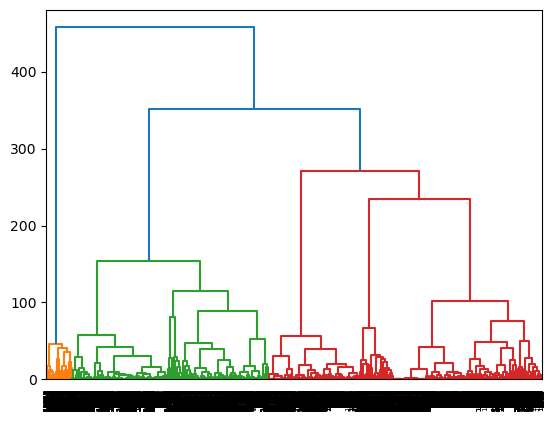

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform linkage
linkage_matrix = linkage(data_scaled, method='ward',metric = "euclidean")

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.show()



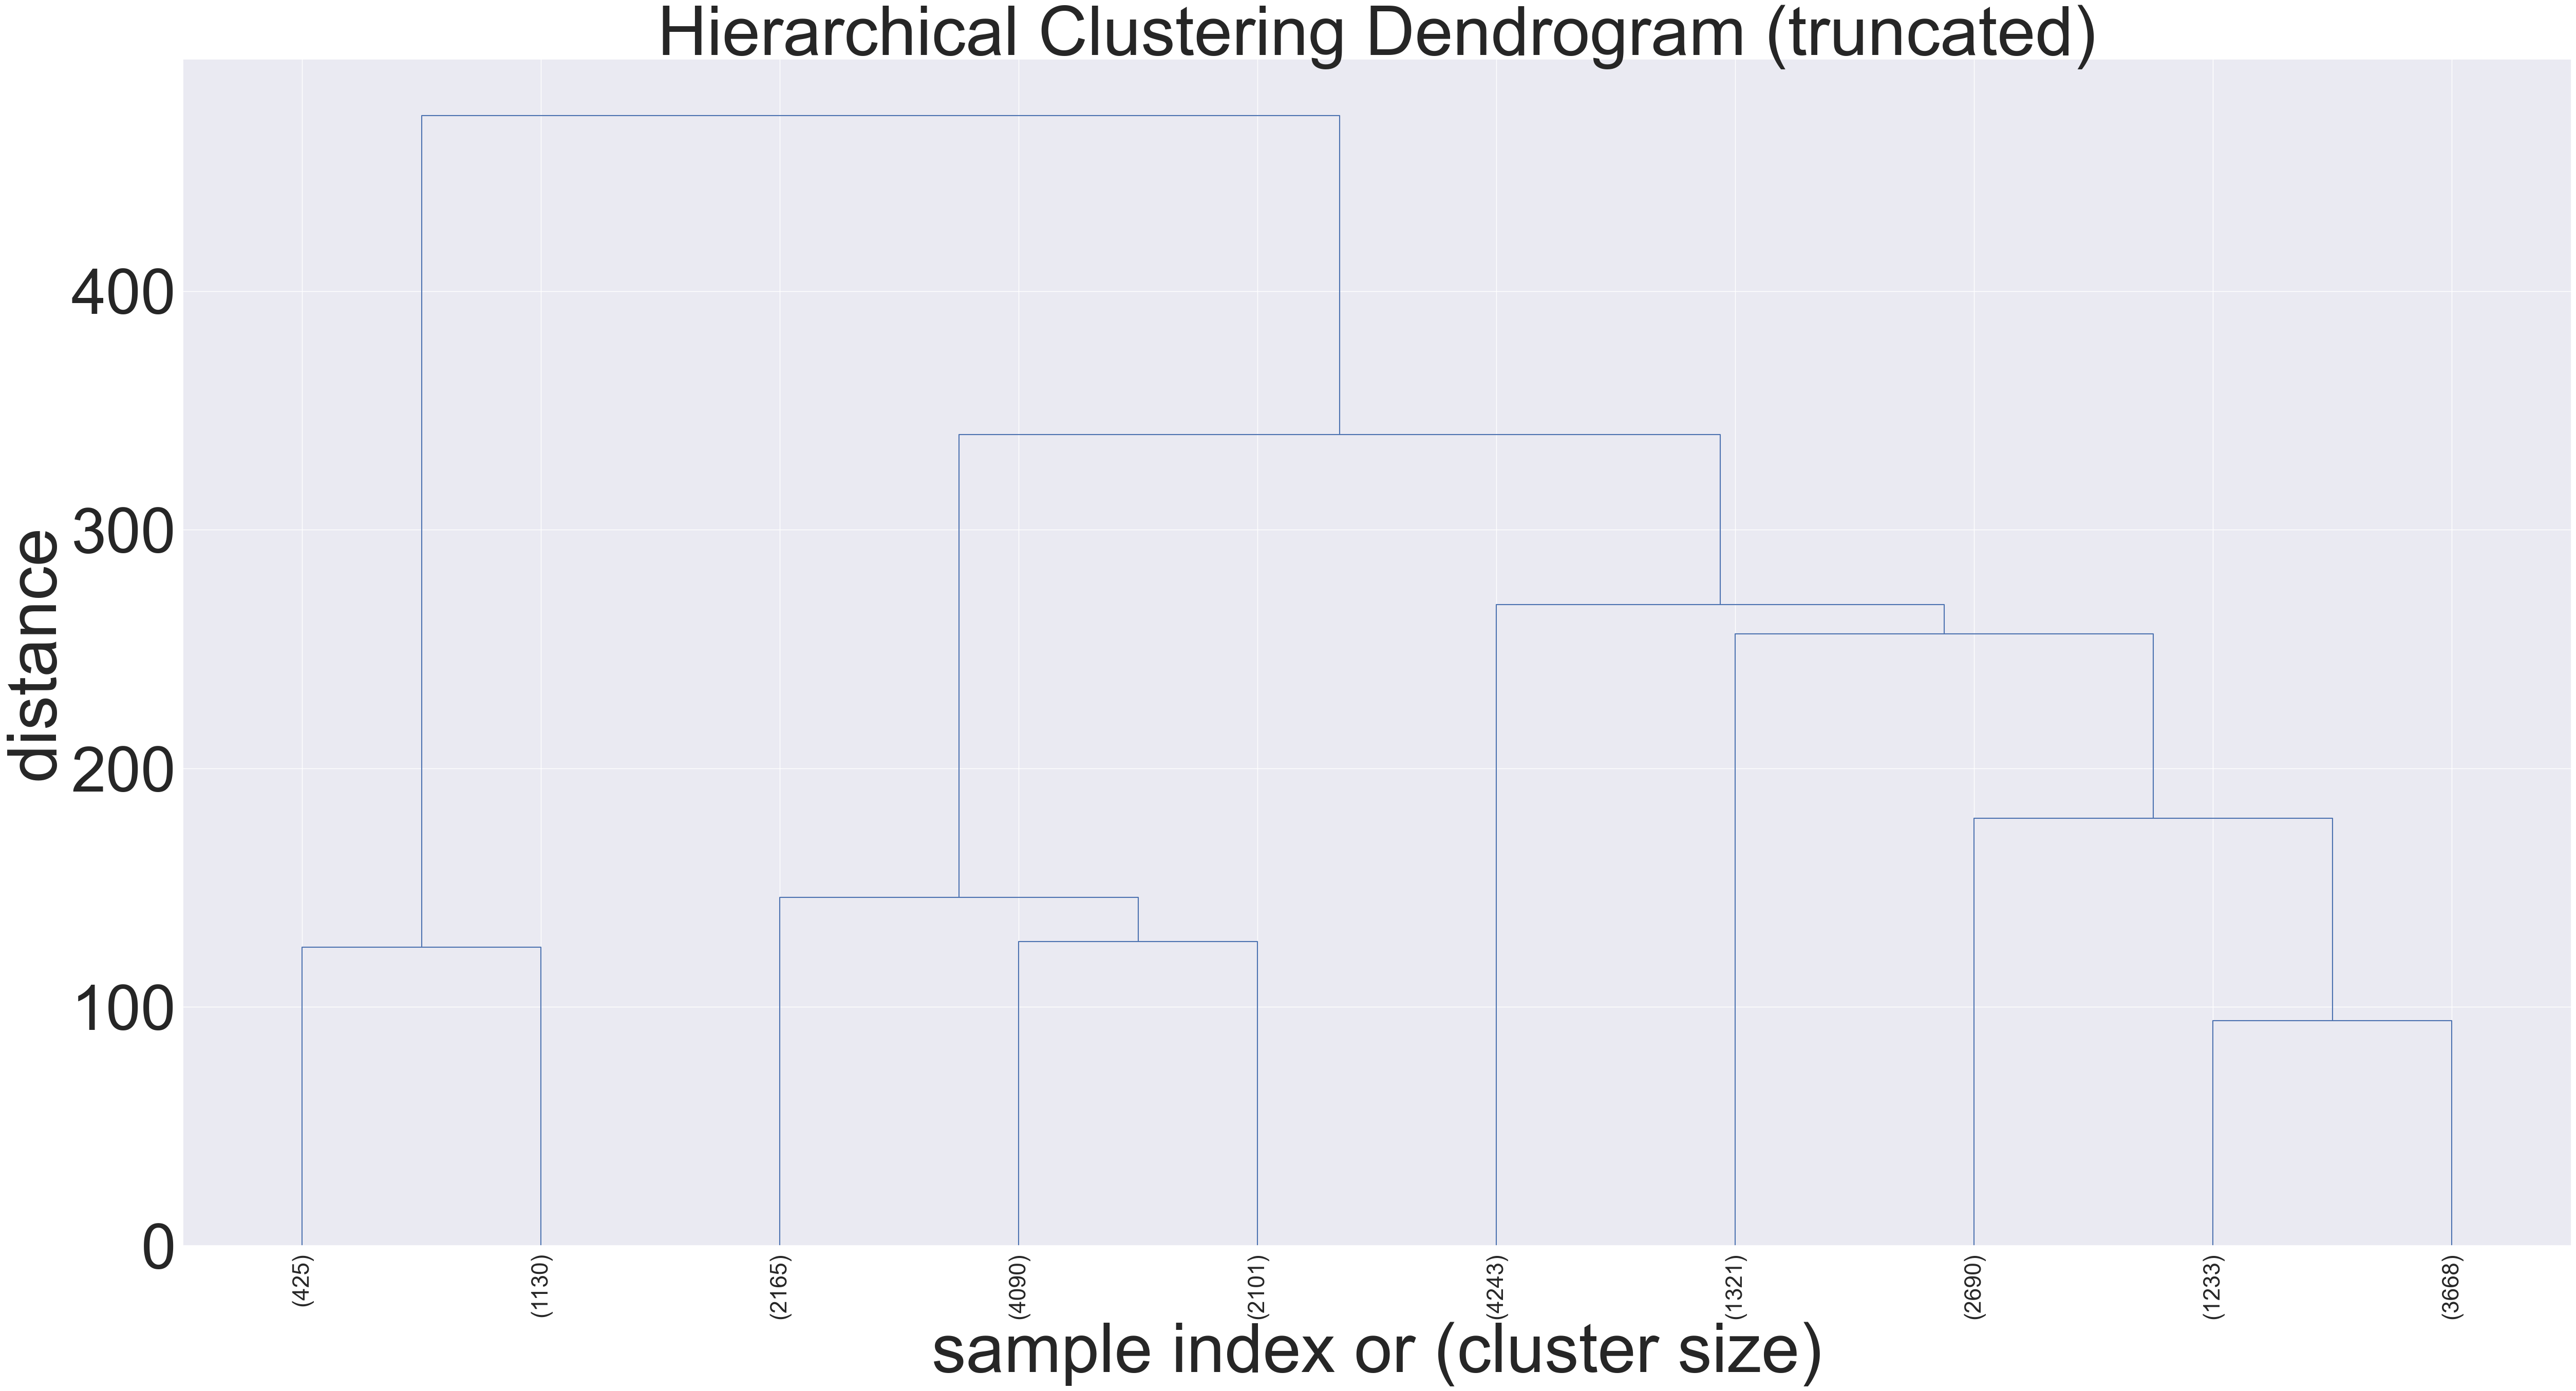

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(60, 30))
Z_Final = linkage(data_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=32,
    color_threshold=10 
)
sns.set(font_scale=8);
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
wss =[] 


In [19]:
from sklearn.cluster import KMeans 


In [20]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)


In [21]:
wss

[299858.0000000004,
 188599.04956715283,
 129615.48563840479,
 93146.058042922,
 64752.26285466068,
 53667.600236071135,
 47241.653794992046,
 42198.11677300315,
 38678.08755881823,
 35304.472905541945]

In [22]:
KM.inertia_


35304.472905541945

In [23]:
plt.plot(range(1,11), wss)



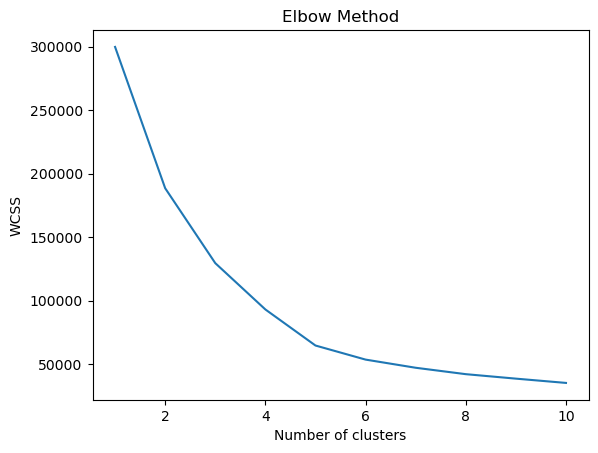

In [24]:
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_scores = []


In [27]:
for i in range(2, 11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(data_scaled)
    labels = KM.labels_
    silhouette_scores.append(silhouette_score(data_scaled,labels,random_state=1))

In [85]:
silhouette_scores

[0.602856419557812,
 0.3652575679239419,
 0.4607204431434948,
 0.5135883146481808,
 0.48269590816160307,
 0.4498981653855406,
 0.4644005845855754,
 0.4611759096845421,
 0.46458876126730303]

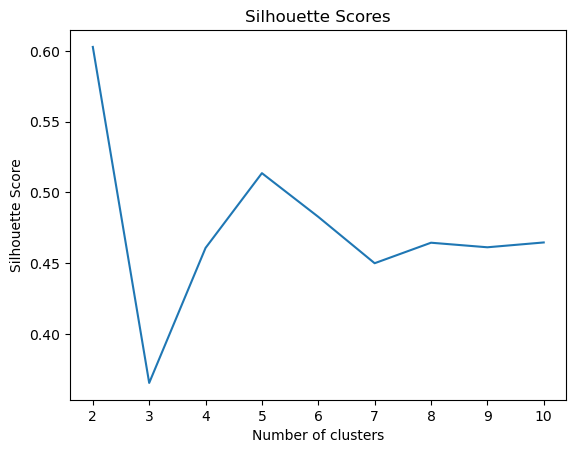

In [29]:

# Plot the silhouette scores
plt.plot(range(2,11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
data["Clus_kmeans5"] = labels
data.head(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,3
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,3
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,3
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,3
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,3


In [31]:
# Perform KMeans with the optimum number of clusterskmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
kmeans

KMeans(n_clusters=5, random_state=1)

In [32]:
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=1)

In [33]:
data['cluster'] = kmeans.labels_
data['cluster']

0        2
1        2
2        2
3        2
4        2
        ..
23061    3
23062    3
23063    3
23064    0
23065    3
Name: cluster, Length: 23066, dtype: int32

In [34]:
data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,3603.647638,392.294742,257.278546,12.245461,0.126262,0.167894
1,18672.698529,16245.137625,12466.210240,2.554646,0.012463,0.800619
2,4572.746545,2514.753548,1688.014445,2.613998,0.014197,0.552883
3,14031.383891,1213.779016,790.501469,10.245675,0.111217,0.160701
4,70513.447839,7428.407444,5359.532972,13.668593,0.128372,0.144172


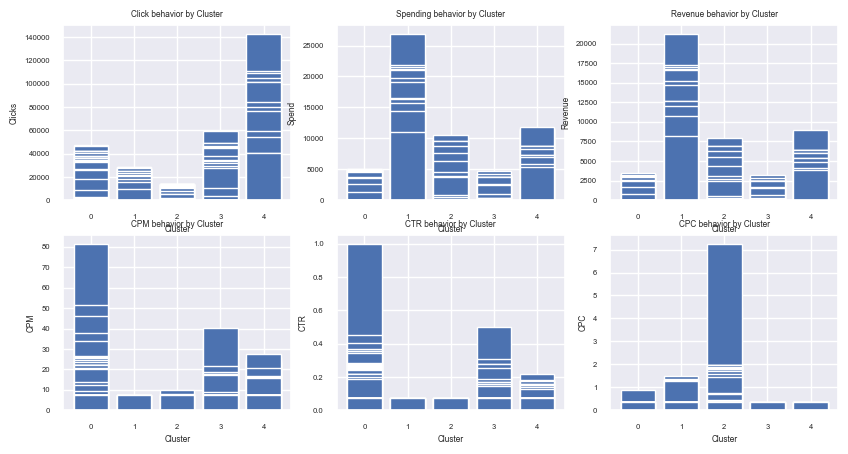

In [35]:
plt.figure(figsize=(10,5))
sns.set(font_scale=0.5);

plt.grid(False)
plt.subplot(2,3,1)

plt.bar(data['cluster'], data['Clicks'])

plt.xlabel('Cluster')

plt.ylabel('Clicks')

plt.title('Click behavior by Cluster')

plt.subplot(2,3,2)

plt.bar(data['cluster'], data['Spend'])

plt.xlabel('Cluster')

plt.ylabel('Spend')

plt.title('Spending behavior by Cluster')
plt.subplot(2,3,3)

plt.bar(data['cluster'], data['Revenue'])

plt.xlabel('Cluster')

plt.ylabel('Revenue')

plt.title('Revenue behavior by Cluster')



plt.subplot(2,3,4)

plt.bar(data['cluster'], data['CPM'])

plt.xlabel('Cluster')

plt.ylabel('CPM')

plt.title('CPM behavior by Cluster')



plt.subplot(2,3,5)

plt.bar(data['cluster'], data['CTR'])

plt.xlabel('Cluster')

plt.ylabel('CTR')

plt.title('CTR behavior by Cluster')



plt.subplot(2,3,6)

plt.bar(data['cluster'], data['CPC'])

plt.xlabel('Cluster')

plt.ylabel('CPC')

plt.title('CPC behavior by Cluster')

plt.show()


In [36]:
# Add the cluster labels to the data
data.Clus_kmeans5.value_counts().sort_index()

0    1161
1    2332
2    3784
3    4068
4    4253
5    1125
6    1902
7    2683
8    1327
9     431
Name: Clus_kmeans5, dtype: int64

In [37]:
cluster_profile=data
cluster_profile=cluster_profile.groupby('Clus_kmeans5').mean()
cluster_profile['freq']=data.Clus_kmeans5.value_counts().sort_index()
cluster_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster,freq
Clus_kmeans5,,,,,,,,,,,,,,,
0,324.651163,250.000000,81162.790698,5.749329e+05,3.170514e+05,3.014777e+05,6530.446167,1027.697623,0.348717,672.430856,0.111091,10.852764,0.179930,0.497847,1161
1,307.264151,259.446827,79004.048027,6.028167e+06,3.330981e+06,3.262743e+06,7917.254288,4570.805069,0.321501,3110.897518,0.013593,2.411907,0.551054,2.000000,2332
2,135.602537,600.000000,81361.522199,9.219228e+04,4.402878e+04,3.556066e+04,1633.885042,208.575151,0.349767,136.548314,0.084433,8.908779,0.231536,0.069239,3784
3,465.004916,91.922321,39808.200590,1.776498e+06,7.672471e+05,7.232513e+05,3714.013029,1318.226900,0.349872,857.333438,0.016554,2.757002,0.369311,2.000000,4068
4,719.111216,300.634846,215923.818481,2.447088e+05,1.338686e+05,1.136154e+05,14076.460851,1217.316120,0.349539,792.813893,0.111128,10.233477,0.160561,2.993652,4253
5,681.710222,118.133333,70300.800000,2.048515e+07,1.082891e+07,1.043345e+07,20134.843556,17219.631733,0.230960,13266.928749,0.012970,2.575381,0.774421,1.000000,1125
6,379.396425,234.290221,78042.018927,2.119774e+06,1.212723e+06,1.177302e+06,2463.796004,2155.837277,0.345715,1418.060319,0.002184,1.863323,0.925883,1.998948,1902
7,132.120760,591.949310,76481.550503,5.759606e+04,4.251626e+04,3.465455e+04,5121.574730,606.748997,0.348811,399.156986,0.180930,16.637890,0.102721,0.012672,2683
8,141.648832,572.833459,75861.341372,8.796916e+05,6.144055e+05,5.184418e+05,70880.221552,7459.232035,0.281809,5383.933831,0.128371,13.653704,0.143923,4.000000,1327
